Abdul Saboor (20L-1113 | BDS-5A1)

This workbook contains an implementation of a linear regression model which is applied on a cleaned dataset
along with the original dataset that was distoted to create dirty data. All codeblocks have a comment block explaining what that code is doing.

In [16]:
"""
Importing modules to use
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

# Working on Cleaned Data

### Reading and Transforming Data

In [17]:
"""
Reading data from excel file and checking if data has been read correctly.
"""

data=pd.read_excel('cleaned data.xlsx')
data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,target
0,0,10.2,7.0,5.6,0.8,Iris-setosa
1,1,9.8,6.0,5.6,0.8,Iris-setosa
2,2,9.4,6.4,5.2,0.8,Iris-setosa
3,3,9.2,6.2,6.0,0.8,Iris-setosa
4,4,10.0,7.2,5.6,0.8,Iris-setosa


In [18]:
"""
Dropping the first column of indexes as it is redundant.
"""

data=data.drop([data.columns[0]],axis=1)
data.head()

,sepal length,sepal width,petal length,petal width,target
0,10.2,7.0,5.6,0.8,Iris-setosa
1,9.8,6.0,5.6,0.8,Iris-setosa
2,9.4,6.4,5.2,0.8,Iris-setosa
3,9.2,6.2,6.0,0.8,Iris-setosa
4,10.0,7.2,5.6,0.8,Iris-setosa


In [19]:
"""
Now before a model can be implemented there is a need to change the output variable (target) to a neumeric value
rather than string. So, following convnetion is used:
1: Iris-setosa
2: Iris-versicolor
3: Iris-virginica
"""

data.loc[data["target"] == "Iris-setosa", "target"] = 1
data.loc[data["target"] == "Iris-versicolor", "target"] = 2
data.loc[data["target"] == "Iris-virginica", "target"] = 3
data.head()

,sepal length,sepal width,petal length,petal width,target
0,10.2,7.0,5.6,0.8,1
1,9.8,6.0,5.6,0.8,1
2,9.4,6.4,5.2,0.8,1
3,9.2,6.2,6.0,0.8,1
4,10.0,7.2,5.6,0.8,1


### Splitting into training and testing data

In [20]:
"""
Here the data frame is split into training and testing data on a 80:20 ratio. This is done to validate the results
after training to know how well the model has performed.
"""

train,test=train_test_split(data,test_size=0.2,random_state=42,shuffle=True)

### Applying regression model

In [21]:
"""
Here the x and y parameters for use in model are being declared.
"""

# x=train[['sepal length','sepal width','petal length','petal width']]
x=train.iloc[:,:-1]
y=train['target']
x

,sepal length,sepal width,petal length,petal width
4,10.0,7.2,5.6,0.8
26,10.4,7.0,6.0,0.8
123,12.2,6.0,19.6,7.2
128,12.8,5.6,22.4,8.8
16,10.2,7.0,5.6,1.2
...,...,...,...,...
71,13.2,6.0,17.6,5.6
106,13.0,6.4,20.4,8.0
14,11.6,8.0,4.8,0.8
92,11.4,5.8,16.8,5.2


In [22]:
"""
Now that all variables are defined it is simple to apply a multi-variable regression model on data.
This block trains the regression model.
"""

regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [23]:
"""
Now that model is trained, testing data can be used to validate model. This code block extracts testing data's
input parameters and uses them to generate a prediction from trained model.
"""

prediction=regr.predict(test.iloc[:,:-1])
prediction

array([0.88671757, 2.77571872, 0.88280401, 0.93009948, 1.00958646,
       2.90594134, 0.99723601, 2.43218961, 2.61347918, 0.97322177,
       0.88867484, 2.49209517, 2.90777538, 2.04966604, 2.8517452 ,
       0.92225253, 2.05808309, 3.06549159, 1.0005341 , 2.16836794,
       3.28032015, 2.5803357 , 0.99012108, 2.09035866, 0.89733168,
       2.1494925 , 2.33748263, 3.01231264, 3.20421631, 0.89733168])

In [24]:
"""
The output from regression model is not integral but rather whole numbers. However the model has specific labels
and this continuous output needs to be discretized. So, the output of model is rounded to nearest integer.
"""

y_pred=np.rint(prediction).astype(int)
y_pred

array([1, 3, 1, 1, 1, 3, 1, 2, 3, 1, 1, 2, 3, 2, 3, 1, 2, 3, 1, 2, 3, 3,
       1, 2, 1, 2, 2, 3, 3, 1])

In [25]:
"""
Now that model has been trained, there is a need to validate model's output to asses accuracy on given dataset.
"""

cleaned_training_size=len(train)
cleaned_testing_size=len(test)
cleaned_accuracy_score=accuracy_score(test['target'].tolist(),y_pred.tolist()) # accuracy score
cleaned_squared_error=mean_squared_error(test['target'].tolist(),y_pred.tolist()) # mean squared error
cleaned_dett_coeff=r2_score(test['target'].tolist(),y_pred.tolist()) # coefficient of determination

# Working on Original Data

In [26]:
"""
Here all the code blocks are combined into one to perform same operations on original data.
The validation results are stored for later use.
"""

data=pd.read_excel('Original Iris.xlsx') # reading data file into a dataframe

data=data.drop([data.columns[0]],axis=1) # dropping the index column

# transforming output variables for use in the model
data.loc[data["target"] == "Iris-setosa", "target"] = 1
data.loc[data["target"] == "Iris-versicolor", "target"] = 2
data.loc[data["target"] == "Iris-virginica", "target"] = 3

train,test=train_test_split(data,test_size=0.2,random_state=42,shuffle=True) # splitting data into training and testing datasets

# Separating input and output variables form training data to use in model
x=train.iloc[:,:-1]
y=train['target']

# fitting regression model on given dataset
regr = linear_model.LinearRegression()
regr.fit(x, y)

prediction=regr.predict(test.iloc[:,:-1]) # storing prediction based on testing data

y_pred=np.rint(prediction).astype(int) # converting continuous predicted output to nearest integer

# calculating and storing validation parameters
original_training_size=len(train)
original_testing_size=len(test)
original_accuracy_score=accuracy_score(test['target'].tolist(),y_pred.tolist()) # accuracy score
original_squared_error=mean_squared_error(test['target'].tolist(),y_pred.tolist()) # mean squared error
original_dett_coeff=r2_score(test['target'].tolist(),y_pred.tolist()) # coefficient of determination

# Working on Dirty Data

In [27]:
"""
Here all the code blocks are combined into one to perform same operations on original data.
The validation results are stored for later use.
"""

data=pd.read_excel('my_iris.xlsx') # reading data file into a dataframe

data=data.dropna()

data=data.drop([data.columns[0]],axis=1) # dropping the index column

# transforming output variables for use in the model
data.loc[data["target"] == "Iris-setosa", "target"] = 1
data.loc[data["target"] == "Iris-versicolor", "target"] = 2
data.loc[data["target"] == "Iris-virginica", "target"] = 3

train,test=train_test_split(data,test_size=0.2,random_state=42,shuffle=True) # splitting data into training and testing datasets

# Separating input and output variables form training data to use in model
x=train.iloc[:,:-1]
y=train['target']

# fitting regression model on given dataset
regr = linear_model.LinearRegression()
regr.fit(x, y)

prediction=regr.predict(test.iloc[:,:-1]) # storing prediction based on testing data

y_pred=np.rint(prediction).astype(int) # converting continuous predicted output to nearest integer

# calculating and storing validation parameters
dirty_training_size=len(train)
dirty_testing_size=len(test)
dirty_accuracy_score=accuracy_score(test['target'].tolist(),y_pred.tolist()) # accuracy score
dirty_squared_error=mean_squared_error(test['target'].tolist(),y_pred.tolist()) # mean squared error
dirty_dett_coeff=r2_score(test['target'].tolist(),y_pred.tolist()) # coefficient of determination

# Report

In [28]:
"""
This blocks prints the values of all validation vaiables used to compare the implementation on different datasets.
"""

print(f"Benchmark: \n")
print(f"Parameters for original dataset ({original_training_size} training examples, {original_testing_size} testing examples) are as follows:")
print(f"  1. Accuracy Score is:{original_accuracy_score}",)
# The mean squared error
print("  2. Mean squared error: %.2f" % original_squared_error)
# The coefficient of determination: 1 is perfect prediction
print("  3. Coefficient of determination: %.2f" % original_dett_coeff)

print(f"\n-----------------------------------------------------------------\n")

print(f"Parameters for dirty dataset ({dirty_training_size} training examples, {dirty_testing_size} testing examples) are as follows:")
print(f"  1. Accuracy Score is:{dirty_accuracy_score}",)
# The mean squared error
print("  2. Mean squared error: %.2f" % dirty_squared_error)
# The coefficient of determination: 1 is perfect prediction
print("  3. Coefficient of determination: %.2f" % dirty_dett_coeff)

print(f"\nParameters for cleaned dataset ({cleaned_training_size} training examples, {cleaned_testing_size} testing examples) are as follows:")
print(f"  1. Accuracy Score is:{cleaned_accuracy_score}",)
# The mean squared error
print("  2. Mean squared error: %.2f" % cleaned_squared_error)
# The coefficient of determination: 1 is perfect prediction
print("  3. Coefficient of determination: %.2f" % cleaned_dett_coeff)

Benchmark: 

Parameters for original dataset (120 training examples, 30 testing examples) are as follows:
  1. Accuracy Score is:1.0
  2. Mean squared error: 0.00
  3. Coefficient of determination: 1.00

-----------------------------------------------------------------

Parameters for dirty dataset (80 training examples, 20 testing examples) are as follows:
  1. Accuracy Score is:0.95
  2. Mean squared error: 0.05
  3. Coefficient of determination: 0.91

Parameters for cleaned dataset (116 training examples, 30 testing examples) are as follows:
  1. Accuracy Score is:0.9333333333333333
  2. Mean squared error: 0.07
  3. Coefficient of determination: 0.91


[Text(0.5, 1.0, 'Coefficient of Determination')]

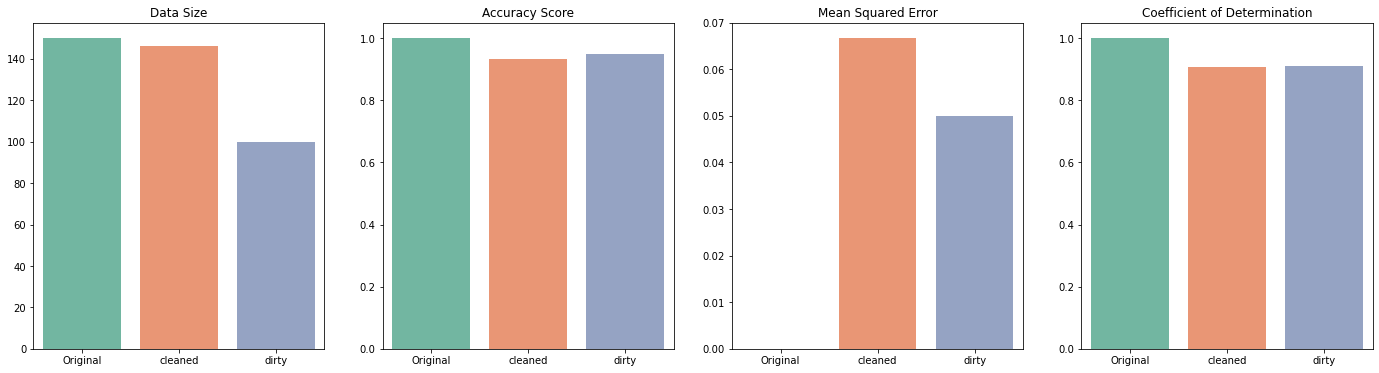

In [29]:
"""
This block plots the following parameters for a vizualization of all three datasets:
  1. Data Size
  2. Accuracy Score of fitted model
  3. Mean Squared Error of model
  4. Coefficient of Determination
"""

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(sns.color_palette("Set2"))
fig,axes=plt.subplots(1,4,figsize=(24,6))
sns.barplot(x=["Original","cleaned","dirty"],y=[(original_training_size + original_testing_size),(cleaned_training_size + cleaned_testing_size),(dirty_training_size + dirty_testing_size)],ax=axes[0]).set(title='Data Size')
sns.barplot(x=["Original","cleaned","dirty"],y=[original_accuracy_score,cleaned_accuracy_score,dirty_accuracy_score],ax=axes[1]).set(title='Accuracy Score')
sns.barplot(x=["Original","cleaned","dirty"],y=[original_squared_error,cleaned_squared_error,dirty_squared_error],ax=axes[2]).set(title='Mean Squared Error')
sns.barplot(x=["Original","cleaned","dirty"],y=[original_dett_coeff,cleaned_dett_coeff,dirty_dett_coeff],ax=axes[3]).set(title='Coefficient of Determination')

In [30]:
"""
After Analyzing the performance on Data, the following conclusions can be reached:

  1: The model performs perfectly on original dataset and yields highest prediction results.

  2: The difficult part is deciding the working the provided dirty set and then again after cleaning that dataset. One thing to note here
     is that although the model shows a slightly better performance on dirty dataset. In real world this is not acceptable as there
     were many null values not accounted for in model and ignoring them resulted in a 33% loss from original dataset. So, for any application
     a cleaner dataset with maximum possible trainign examples is preferred.
    
  3: Finally, the cleaned dataset resulted in a 93% accuracy in predictions compared to original dataset. This shows that the data was 
     cleaned quite properly and resulted more than 90% accuracy. In addition to that the mean-squared error is quite low, having a value of 0.07.
     Now this compared to oriiginal can be interpreted as cleaned data having an almost perfect fit with exception to a few outliers.

In Conclusion, the cleaning methods used were efficient, resulting in useful data that trained model with minimum abnormalities. The resulting 
model handled most predictions accurately as tested with the randomly separated testing data from input sample.
"""
print() # to give clear output